# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats
import csv



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [4]:
#list of city Data

City_Weather_Data = []

for city in cities:
    
     # Create endpoint URL with each city
    city_url = url + "&q=" + city
    city_url = city_url.replace(" ", "%20")

    print(" Beginning Data Retrieval ")
    print("--------------------------------")
    try:
   
        #w_response = requests.get(city_url).json()
        w_response_json = requests.get(city_url).json()
    
              
        city_latitute = w_response_json["coord"]["lat"]
        city_longitude = w_response_json ["coord"]["lon"]
        city_max_temperature = w_response_json ["main"]["temp_max"]
        city_humidity = w_response_json ["main"]["humidity"]
        city_clouds = w_response_json ["clouds"]["all"]
        city_wind = w_response_json ["wind"]["speed"]
        city_country = w_response_json ["sys"]["country"]
        city_date =  w_response_json ["dt"]
        City_Weather_Data.append({'city': city, 
                          'latitude':city_latitute,
                          'longitude':city_longitude, 
                          'Temperature':city_max_temperature,
                          'humidity': city_humidity,
                          'windspeed':city_wind,
                          'cloudiness': city_clouds,
                          'country': city_country,
                          'date':city_date
                         })
        print(f"{city}, found")
    except Exception as e:
        print(e)

        print(f"{city},city not found")
        pass

 Beginning Data Retrieval 
--------------------------------
tasiilaq, found
 Beginning Data Retrieval 
--------------------------------
ushuaia, found
 Beginning Data Retrieval 
--------------------------------
dikson, found
 Beginning Data Retrieval 
--------------------------------
yellowknife, found
 Beginning Data Retrieval 
--------------------------------
georgetown, found
 Beginning Data Retrieval 
--------------------------------
busselton, found
 Beginning Data Retrieval 
--------------------------------
atuona, found
 Beginning Data Retrieval 
--------------------------------
'coord'
attawapiskat,city not found
 Beginning Data Retrieval 
--------------------------------
rikitea, found
 Beginning Data Retrieval 
--------------------------------
'coord'
barentsburg,city not found
 Beginning Data Retrieval 
--------------------------------
sawtell, found
 Beginning Data Retrieval 
--------------------------------
cortez, found
 Beginning Data Retrieval 
-------------------------

petropavlovsk-kamchatskiy, found
 Beginning Data Retrieval 
--------------------------------
bereda, found
 Beginning Data Retrieval 
--------------------------------
tooele, found
 Beginning Data Retrieval 
--------------------------------
nouadhibou, found
 Beginning Data Retrieval 
--------------------------------
mareeba, found
 Beginning Data Retrieval 
--------------------------------
sigmaringen, found
 Beginning Data Retrieval 
--------------------------------
kathmandu, found
 Beginning Data Retrieval 
--------------------------------
boali, found
 Beginning Data Retrieval 
--------------------------------
andenes, found
 Beginning Data Retrieval 
--------------------------------
rodrigues alves, found
 Beginning Data Retrieval 
--------------------------------
anapolis, found
 Beginning Data Retrieval 
--------------------------------
japura, found
 Beginning Data Retrieval 
--------------------------------
salinopolis, found
 Beginning Data Retrieval 
-----------------------

naze, found
 Beginning Data Retrieval 
--------------------------------
stara synyava, found
 Beginning Data Retrieval 
--------------------------------
atbasar, found
 Beginning Data Retrieval 
--------------------------------
saint george, found
 Beginning Data Retrieval 
--------------------------------
hithadhoo, found
 Beginning Data Retrieval 
--------------------------------
flinders, found
 Beginning Data Retrieval 
--------------------------------
tezu, found
 Beginning Data Retrieval 
--------------------------------
terrace bay, found
 Beginning Data Retrieval 
--------------------------------
bahia blanca, found
 Beginning Data Retrieval 
--------------------------------
'coord'
mullaitivu,city not found
 Beginning Data Retrieval 
--------------------------------
chikhli, found
 Beginning Data Retrieval 
--------------------------------
longyearbyen, found
 Beginning Data Retrieval 
--------------------------------
sergeyevka, found
 Beginning Data Retrieval 
--------------

kemi, found
 Beginning Data Retrieval 
--------------------------------
wangkui, found
 Beginning Data Retrieval 
--------------------------------
sao filipe, found
 Beginning Data Retrieval 
--------------------------------
ilulissat, found
 Beginning Data Retrieval 
--------------------------------
arraial do cabo, found
 Beginning Data Retrieval 
--------------------------------
sovetskiy, found
 Beginning Data Retrieval 
--------------------------------
nautla, found
 Beginning Data Retrieval 
--------------------------------
malanje, found
 Beginning Data Retrieval 
--------------------------------
san francisco, found
 Beginning Data Retrieval 
--------------------------------
rio do sul, found
 Beginning Data Retrieval 
--------------------------------
namtsy, found
 Beginning Data Retrieval 
--------------------------------
asyut, found
 Beginning Data Retrieval 
--------------------------------
'coord'
stamsund,city not found
 Beginning Data Retrieval 
------------------------

'coord'
louisbourg,city not found
 Beginning Data Retrieval 
--------------------------------
aklavik, found
 Beginning Data Retrieval 
--------------------------------
raudeberg, found
 Beginning Data Retrieval 
--------------------------------
east london, found
 Beginning Data Retrieval 
--------------------------------
boshnyakovo, found
 Beginning Data Retrieval 
--------------------------------
'coord'
nizhneyansk,city not found
 Beginning Data Retrieval 
--------------------------------
nichinan, found
 Beginning Data Retrieval 
--------------------------------
igrim, found
 Beginning Data Retrieval 
--------------------------------
port macquarie, found
 Beginning Data Retrieval 
--------------------------------
villefontaine, found
 Beginning Data Retrieval 
--------------------------------
turbat, found
 Beginning Data Retrieval 
--------------------------------
celestun, found
 Beginning Data Retrieval 
--------------------------------
valdemarpils, found
 Beginning Data Ret

yakeshi, found
 Beginning Data Retrieval 
--------------------------------
'coord'
burkhala,city not found
 Beginning Data Retrieval 
--------------------------------
alice springs, found
 Beginning Data Retrieval 
--------------------------------
najran, found
 Beginning Data Retrieval 
--------------------------------
cap-aux-meules, found
 Beginning Data Retrieval 
--------------------------------
nova olimpia, found
 Beginning Data Retrieval 
--------------------------------
sorong, found
 Beginning Data Retrieval 
--------------------------------
saint-augustin, found
 Beginning Data Retrieval 
--------------------------------
vikulovo, found
 Beginning Data Retrieval 
--------------------------------
'coord'
bengkalis,city not found
 Beginning Data Retrieval 
--------------------------------
karema, found
 Beginning Data Retrieval 
--------------------------------
jiangyou, found
 Beginning Data Retrieval 
--------------------------------
strimonikon, found
 Beginning Data Retrie

In [5]:
# Create counters
    #record_count = 1
    #set_count = 1


    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
#city_df = pd.DataFrame(City_Weather_Data)
#city_df = pd.DataFrame
#DataFrame.head()
cities_df=pd.DataFrame(City_Weather_Data)
cities_df.count()

city           555
latitude       555
longitude      555
Temperature    555
humidity       555
windspeed      555
cloudiness     555
country        555
date           555
dtype: int64

In [68]:

cities_df.to_csv("../resources/weatherdata.csv", index = False)
# Mapping lets you format an entire DataFrame
#file = "Output Data/Weather Data.csv"
#weather_df = pd.read_csv(file)
#rint(cities_df.count())
cities_df.head()

,city,latitude,longitude,Temperature,humidity,windspeed,cloudiness,country,date
0,tasiilaq,65.6145,-37.6368,42.96,74,5.35,99,GL,1660803100
1,ushuaia,-54.8000,-68.3000,40.66,56,9.22,40,AR,1660803100
2,dikson,73.5069,80.5464,40.87,78,7.45,100,RU,1660803101
3,yellowknife,62.4560,-114.3525,64.56,77,8.99,46,CA,1660803101
4,georgetown,5.4112,100.3354,89.89,66,11.50,20,MY,1660802938


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [69]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data = cities_df.loc[cities_df['humidity'] <100 ]
cleaned_city_data

,city,latitude,longitude,Temperature,humidity,windspeed,cloudiness,country,date
0,tasiilaq,65.6145,-37.6368,42.96,74,5.35,99,GL,1660803100
1,ushuaia,-54.8000,-68.3000,40.66,56,9.22,40,AR,1660803100
2,dikson,73.5069,80.5464,40.87,78,7.45,100,RU,1660803101
3,yellowknife,62.4560,-114.3525,64.56,77,8.99,46,CA,1660803101
4,georgetown,5.4112,100.3354,89.89,66,11.50,20,MY,1660802938
...,...,...,...,...,...,...,...,...,...
550,acarau,-2.8856,-40.1200,77.11,80,15.77,74,BR,1660803413
551,northam,51.0333,-4.2167,62.38,93,5.53,100,GB,1660803414
552,hoi an,15.8794,108.3350,93.16,56,10.33,47,VN,1660803414
553,nisia floresta,-6.0911,-35.2086,73.78,88,8.68,89,BR,1660803415


In [70]:
#  Get the indices of cities that have humidity over 100%.
#cleaned_city_data.Int64Index
#Int64Index([cleaned_city_data], dtype='int64')
cleaned_city_data=pd.DataFrame(cleaned_city_data)
cleaned_city_data.count()

city           549
latitude       549
longitude      549
Temperature    549
humidity       549
windspeed      549
cloudiness     549
country        549
date           549
dtype: int64

In [71]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

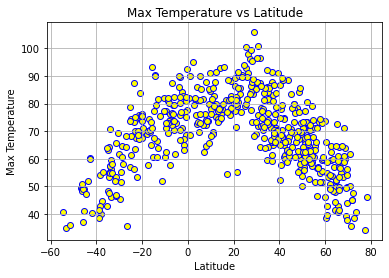

In [72]:
#plt.scatter(cities_df["latitude'], weather_df['Max Temp'],)
first_X = cleaned_city_data['latitude']
first_Y = cleaned_city_data['Temperature']
colors = ['yellow']
plt.scatter(first_X, first_Y, edgecolors='blue', c=colors)
plt.title('Max Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.savefig('../resources/lat_temp.png')
plt.show()

## Latitude vs. Humidity Plot

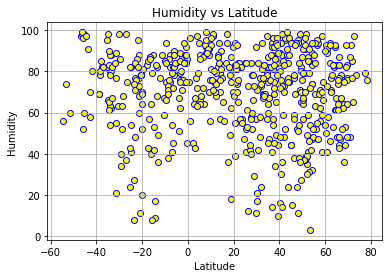

In [73]:
#scatter plot
first_x = cleaned_city_data['latitude']
first_y = cleaned_city_data['humidity']
colors = ['yellow']
plt.scatter(first_x, first_y, edgecolors='blue', c=colors)
plt.title('Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig('../resources/lat_humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

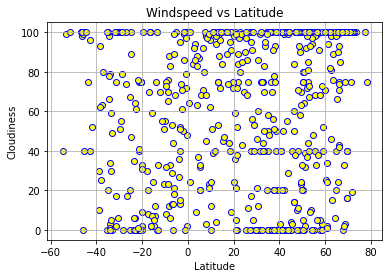

In [74]:
first_x = cleaned_city_data['latitude']
first_y = cleaned_city_data['cloudiness']
colors = ['yellow']
plt.scatter(first_x, first_y, edgecolors='blue', c=colors)
plt.title('Windspeed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig('../resources/lat_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

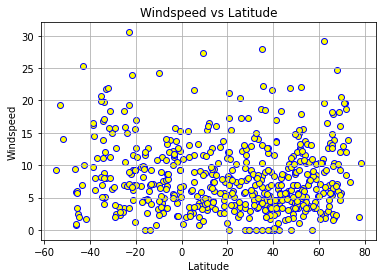

In [75]:
first_x = cleaned_city_data['latitude']
first_y = cleaned_city_data['windspeed']
colors = ['yellow']
plt.scatter(first_x, first_y, edgecolors='blue', c=colors)
plt.title('Windspeed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.grid()
plt.savefig('../resources/lat_wind.png')
plt.show()


## Linear Regression

In [76]:
## Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[pd.to_numeric(cities_df["latitude"]).astype(float) > 0, :]
southern_df = cities_df.loc[pd.to_numeric(cities_df["latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [77]:
xlatN_values = pd.to_numeric(northern_df['latitude']).astype(float)
ytempN_values = pd.to_numeric(northern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatN_values, ytempN_values)
regress_values = xlatN_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

Regression line equation is: y = -0.49x + 89.43
The r-squared is: -0.6936028958125109


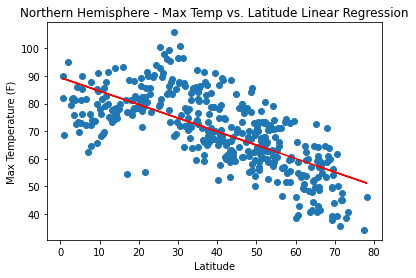

In [78]:
plt.scatter(xlatN_values,ytempN_values,)
plt.plot(xlatN_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
plt.savefig('../resources/North_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [79]:
xlatS_values = pd.to_numeric(southern_df['latitude']).astype(float)
ytempS_values = pd.to_numeric(southern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatS_values, ytempS_values)
regress_values = xlatS_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

Regression line equation is: y = 0.75x + 81.7
The r-squared is: 0.769506156804059


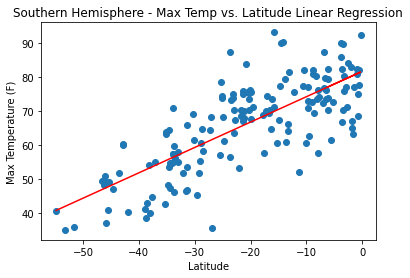

In [80]:
plt.scatter(xlatS_values,ytempS_values)
plt.plot(xlatS_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
plt.savefig('../resources/South_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [81]:
xlatN_values = pd.to_numeric(northern_df['latitude']).astype(float)
yHumidN_values = pd.to_numeric(northern_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatN_values, yHumidN_values)
regress_values = xlatN_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

Regression line equation is: y = -0.09x + 73.88
The r-squared is: -0.08625291337391876


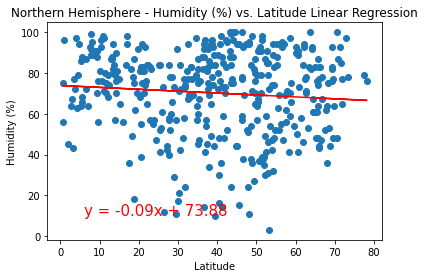

In [82]:
plt.scatter(xlatN_values,yHumidN_values)
plt.plot(xlatN_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title( 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
plt.savefig('../resources/North_humid.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [83]:
xlatS_values = pd.to_numeric(southern_df['latitude']).astype(float)
yHumidS_values = pd.to_numeric(southern_df['humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatS_values, yHumidS_values)
regress_values = xlatS_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

Regression line equation is: y = -0.05x + 69.62
The r-squared is: -0.03719257959284873


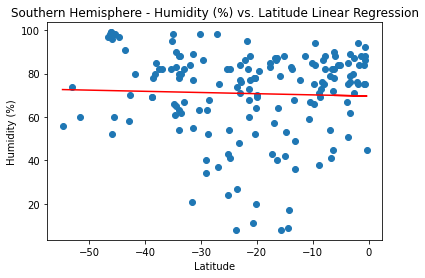

In [84]:
plt.scatter(xlatS_values,yHumidS_values)
plt.plot(xlatS_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title( 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
plt.savefig('../resources/South_humid.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 58.76


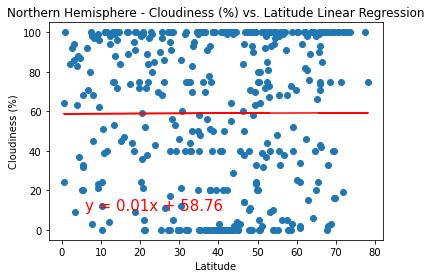

In [85]:
xlatN_values = pd.to_numeric(northern_df['latitude']).astype(float)
ycloudN_values = pd.to_numeric(northern_df['cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatN_values, ycloudN_values)
regress_values = xlatN_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(xlatN_values,ycloudN_values)
plt.plot(xlatN_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('../resources/North_cloud.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.31x + 43.07


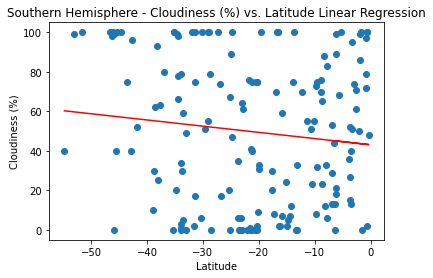

In [86]:
xlatS_values = pd.to_numeric(southern_df['latitude']).astype(float)
ycloudS_values = pd.to_numeric(southern_df['cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatS_values, ycloudS_values)
regress_values = xlatS_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(xlatS_values,ycloudS_values)
plt.plot(xlatS_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('../resources/South_cloud.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 6.77


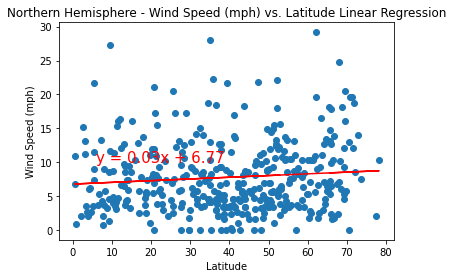

In [87]:
xlatN_values = pd.to_numeric(northern_df['latitude']).astype(float)
yWindN_values = pd.to_numeric(northern_df['windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatN_values, yWindN_values)
regress_values = xlatN_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(xlatN_values,yWindN_values)
plt.plot(xlatN_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('../resources/North_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 7.99


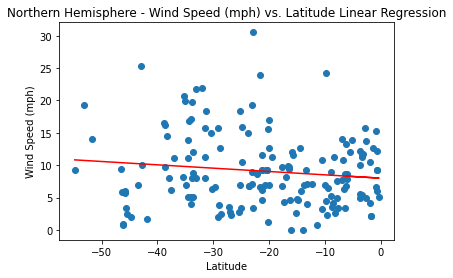

In [88]:
xlatS_values = pd.to_numeric(southern_df['latitude']).astype(float)
yWindS_values = pd.to_numeric(southern_df['windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlatS_values, yWindS_values)
regress_values = xlatS_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(xlatS_values,yWindS_values)
plt.plot(xlatS_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('../resources/South_wind.png')
plt.show()